In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../../datasets/toxic_comments_1.csv",nrows=3000)

In [3]:
dataset = dataset[["comment_text","toxic"]]

In [4]:
#cleaning the text
dataset.columns = ["comment","toxic"]
dataset["comment"] = dataset["comment"].str.replace("\n"," ")

In [5]:
bag_of_words = []
import re
for i in range(0,3000):
    words = re.sub('[^a-zA-Z]',' ',dataset["comment"][i])
    words = words.lower().split()
    words = [word for word in words if not word in set(stopwords.words("english"))]
    sentence = ' '.join(words)
    bag_of_words.append(sentence)

In [6]:
bag_of_words[0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

In [7]:
dataset["toxic"].value_counts()

0    2693
1     307
Name: toxic, dtype: int64

In [8]:
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(bag_of_words).toarray()
y = dataset["toxic"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [9]:
from sklearn.svm import SVC

In [10]:
classifier = SVC(kernel='linear')

In [11]:
classifier.fit(X_train,y_train)


SVC(kernel='linear')

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[515,  18],
       [ 37,  30]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
#accuracy
accuracies.mean()

0.9108333333333334

In [16]:
pre = precision_score(y_test,y_pred)
pre

0.625

In [17]:
rec = recall_score(y_test,y_pred)
rec

0.44776119402985076

In [18]:
f1 = f1_score(y_test,y_pred)
f1

0.5217391304347827

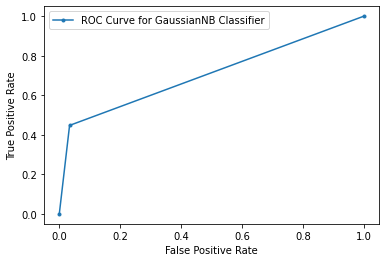

In [19]:
from sklearn.metrics import roc_curve
fp,tp,treshold = roc_curve(y_test,y_pred)
plt.plot(fp,tp,marker = '.',label='ROC Curve for GaussianNB Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
def get_roc_area_and_tp_and_fp_rates():
    tn, fp, fn, tp = cm.ravel()
    print("True positive rate = ",tp/(tp + fn))
    print("False positive rate = ",fp/(tn + fp))
    area = roc_auc_score(y_test,y_pred)
    print("ROC area == ",area)
    
get_roc_area_and_tp_and_fp_rates()

True positive rate =  0.44776119402985076
False positive rate =  0.03377110694183865
ROC area ==  0.7069950435440061
